<a href="https://colab.research.google.com/github/hidayetyakupoglu/Anomaly-Detection/blob/master/windy_GF_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
!wget https://github.com/hidayetyakupoglu/wind-data/blob/49ddb5bcde2639f741ac0fedfb3aeaef3da5d2c9/wind_fault.xlsx

--2024-04-29 18:58:04--  https://github.com/hidayetyakupoglu/wind-data/blob/49ddb5bcde2639f741ac0fedfb3aeaef3da5d2c9/wind_fault.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘wind_fault.xlsx.1’

wind_fault.xlsx.1       [ <=>                ] 258.09K  --.-KB/s    in 0.06s   

2024-04-29 18:58:04 (3.93 MB/s) - ‘wind_fault.xlsx.1’ saved [264282]



In [458]:
!"https://github.com/hidayetyakupoglu/wind-data/blob/b14ee90fe58f1f90ea8eee9e2893e7b139fbdf28/wind_fault.csv"

/bin/bash: line 1: https://github.com/hidayetyakupoglu/wind-data/blob/b14ee90fe58f1f90ea8eee9e2893e7b139fbdf28/wind_fault.csv: No such file or directory


In [3]:
!pip install openpyxl

In [462]:
import pandas as pd
import openpyxl
ddf = pd.read_excel('wind_fault.xlsx')


In [206]:
ddf

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [207]:
# prompt: Unnamed: 0 adlı sütunu sil

ddf.drop('Unnamed: 0', axis=1, inplace=True)
ddf


KeyError: "['Unnamed: 0'] not found in axis"

In [209]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


from numpy.random import seed
import tensorflow as tf
#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [463]:
data=ddf

In [464]:
perc=0.3   # test oranı orn:0.3 ise %70 train %30 testtir
fau='GF'   # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'GF'

In [212]:
data

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [213]:
data = data[data['Fault'].isin([fau, 'NF'])]
data

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [214]:
data_hy=data

#data_hy = data_hy.drop(data_hy[(data_hy['WEC: max. Power'] == 0) & (data_hy.iloc[:, -1] == 'NF')].index)
data_nf = data_hy[data_hy.Fault == 'NF'].sample(2000, random_state = 123)

df_f = data_hy[data_hy.Fault!='NF']



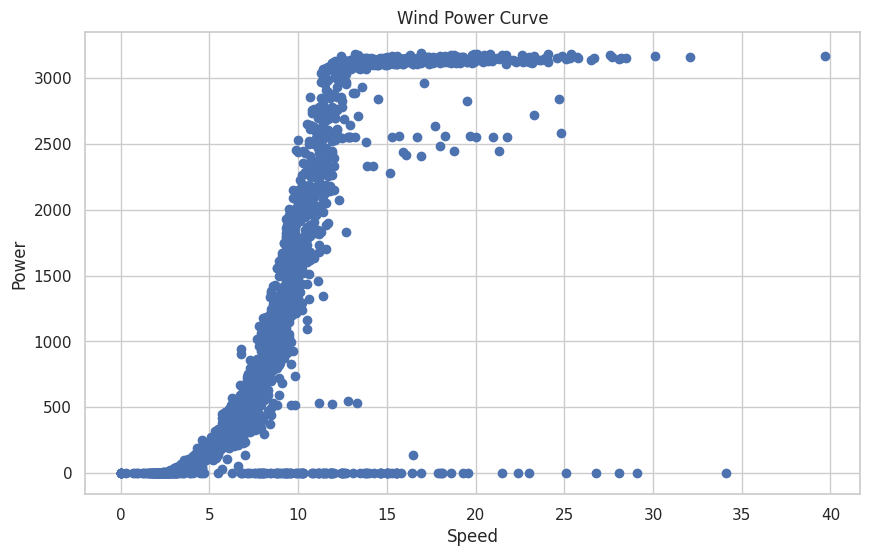

In [215]:
w_data=data_nf
w_data=w_data.sort_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(w_data['WEC: max. windspeed'], w_data['WEC: max. Power'],'o')  # Adjust column names as needed

plt.xlabel('Speed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

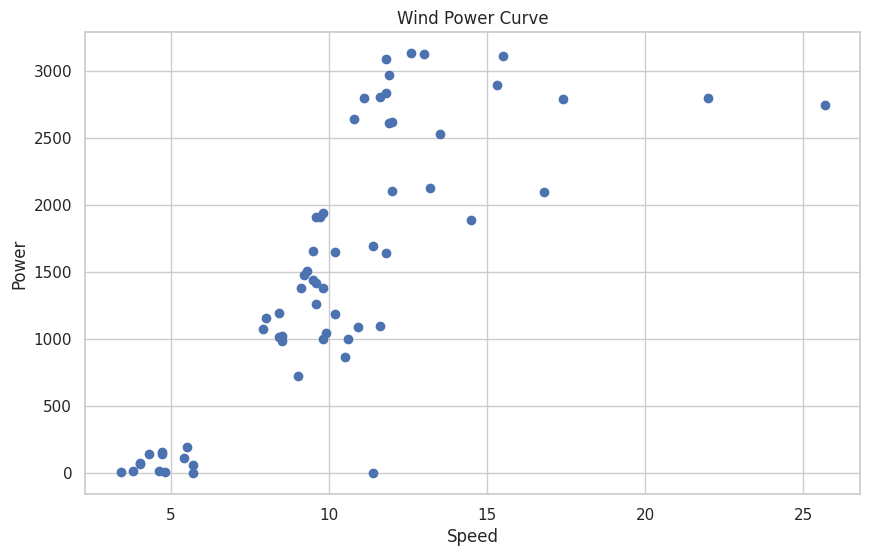

In [216]:
w_data1=df_f
w_data1=w_data1.sort_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(w_data1['WEC: max. windspeed'], w_data1['WEC: max. Power'],'o')  # Adjust column names as needed

plt.xlabel('Speed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

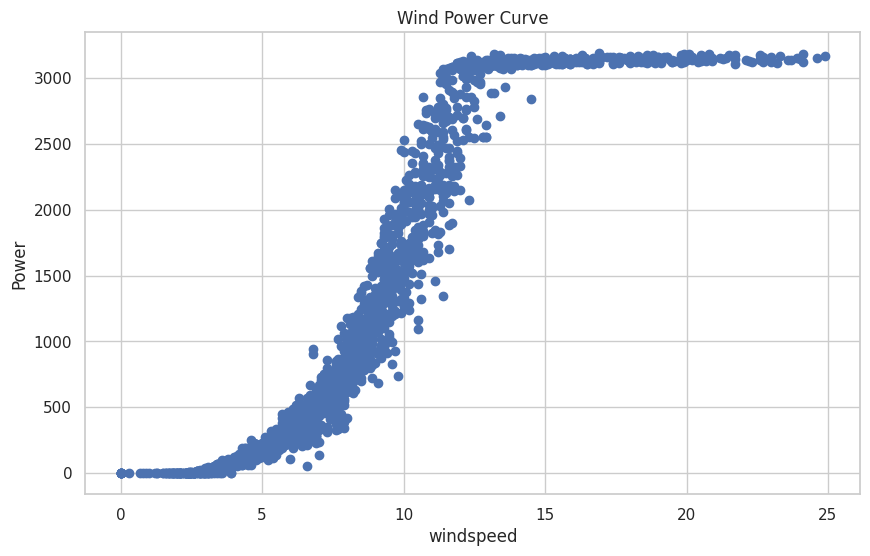

In [217]:
df1=w_data
con0 = (df1['WEC: max. windspeed'] > 8) & (df1['WEC: max. Power'] < 600)

con1 = (df1['WEC: max. windspeed'] > 12) & (df1['WEC: max. Power'] < 2000)

con2 = (df1['WEC: max. windspeed'] > 14) & (df1['WEC: max. Power'] < 2800)

# İkinci koşul: Rüzgar hızı 8'den büyük ve güç 600'den düşükse


con3 = (df1['WEC: max. windspeed'] > 15) & (df1['WEC: max. Power'] < 3000)
con4 = (df1['WEC: max. windspeed'] > 13) & (df1['WEC: max. Power'] < 2700)

con5 = (df1['WEC: max. windspeed'] > 4) & (df1['WEC: max. Power'] < 50)

con6 = (df1['WEC: max. windspeed'] > 25) & (df1['WEC: max. Power'] > 3000)

# İki koşulu birleştirip uygun olan satırları seçelim
mask = con0 | con1| con2| con3| con4| con5| con6

# Maskeye uyan satırları DataFrame'den çıkaralım
df2 = df1[~mask]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df2['WEC: max. windspeed'], df2['WEC: max. Power'],'o')  # Adjust column names as needed
plt.xlabel('windspeed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

In [218]:
df2.reset_index(drop=True, inplace=True)


In [219]:
df_combine = pd.concat((df2, df_f), axis=0).reset_index(drop=True)

df_combine
data_hy1=df_combine

data_hy1=data_hy1.set_index('DateTime_x')

In [220]:
data_hy1

,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,WEC: ava. Nacel position including cable twisting,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-14 15:50:00,3.8,6.600000,0.6,3.37,7.06,0.00,24,57,0,-69,...,24,28,18,20,29,35,2501,27.454546,1.863525,NF
2014-05-14 23:30:00,2.4,3.200000,1.8,5.54,5.88,4.90,23,41,2,-78,...,24,29,14,17,27,37,2501,29.454546,1.128152,NF
2014-05-15 03:19:00,2.0,2.600000,1.5,4.52,4.89,3.75,0,2,0,-14,...,24,28,12,16,26,37,2501,27.909090,0.831209,NF
2014-05-15 11:49:00,2.3,3.900000,0.1,0.01,0.30,0.00,0,0,0,202,...,23,25,15,15,19,32,2501,22.090910,1.044466,NF
2014-05-15 19:10:00,2.6,3.600000,1.9,5.63,6.01,5.35,25,51,12,198,...,28,34,14,16,26,34,2501,27.545454,0.934199,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-14 23:00:00,13.5,22.000000,7.7,14.69,15.19,13.83,2736,2798,2417,-78,...,21,24,8,29,35,57,3050,25.909090,1.814086,AF
2015-01-14 23:09:00,15.5,25.700001,1.9,2.53,14.67,0.00,20,2746,0,-76,...,21,23,7,22,35,57,3050,28.181818,1.834022,AF
2015-01-15 22:50:00,8.4,9.700000,6.8,12.79,13.30,11.64,1667,1914,1259,-66,...,17,21,5,21,28,42,3050,20.909090,1.300350,AF


In [221]:
# prompt: Fault= NF olan ve WEC: max. Power=0 olan satırları göster ve bunları temizle


# Filter the data to show only rows where Fault=NF and WEC: max. Power=0
filtered_data = data_hy1[(data_hy1['Fault'] == 'NF') & (data_hy1['WEC: max. Power'] == 0) & (data_hy1['WEC: max. windspeed']==0)& (data_hy1['WEC: max. Rotation']==0)]

# Print the filtered data
print(filtered_data)

# Remove the filtered rows from the original data
cleaned_data = data_hy1.drop(filtered_data.index)

# Print the cleaned data
print(cleaned_data)


                     WEC: ava. windspeed  WEC: max. windspeed  \
DateTime_x                                                      
2014-09-25 16:20:00                  4.6                  0.0   
2014-09-26 11:59:00                  5.3                  0.0   
2014-09-27 10:30:00                  0.5                  0.0   
2014-12-10 10:40:00                  0.0                  0.0   
2015-01-05 19:18:00                  0.0                  0.0   
2015-01-06 05:50:00                  0.0                  0.0   
2015-01-06 08:19:00                  0.0                  0.0   
2015-01-06 09:10:00                  0.0                  0.0   

                     WEC: min. windspeed  WEC: ava. Rotation  \
DateTime_x                                                     
2014-09-25 16:20:00               6553.5                 0.0   
2014-09-26 11:59:00               6553.5                 0.0   
2014-09-27 10:30:00               6553.5                 0.0   
2014-12-10 10:40:00          

In [222]:
# prompt: 2014-05-18 tarihinden önceki verileri çıkar

cleaned_data = cleaned_data[cleaned_data.index > '2014-05-17']


In [223]:
data_hy

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [375]:
# Filtre uygulamadan

# data_af=cleaned_data

data_hy = pd.concat((data_nf, df_f), axis=0).reset_index(drop=True)


data_hy=data_hy.set_index('DateTime_x')


data_hy = data_hy[data_hy.index > '2014-05-17']

data_af=data_hy


data_af = data_af.sort_index()


data_af = data_af.drop(columns=['WEC: ava. blade angle A','WEC: ava. reactive Power','WEC: min. Rotation','WEC: max. Rotation','WEC: ava. Rotation','WEC: min. windspeed','WEC: ava. Power','WEC: max. reactive Power','WEC: min. Power','WEC: min. reactive Power','WEC: Production kWh','WEC: ava. available P from wind','WEC: ava. windspeed','WEC: max. windspeed','WEC: max. Power'])

In [376]:
hdata=data_af['Fault'].replace('NF', 0, inplace=True)
hdata=data_af['Fault'].replace(fau, 1, inplace=True)

In [377]:
data_afx= data_af.drop(columns=['Fault'])
data_afx

,WEC: ava. Nacel position including cable twisting,Sys 1 inverter 1 cabinet temp.,Sys 1 inverter 2 cabinet temp.,Sys 1 inverter 3 cabinet temp.,Sys 1 inverter 4 cabinet temp.,Sys 1 inverter 5 cabinet temp.,Sys 1 inverter 6 cabinet temp.,Sys 1 inverter 7 cabinet temp.,Sys 2 inverter 1 cabinet temp.,Sys 2 inverter 2 cabinet temp.,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-17 02:30:00,288,26,27,26,26,27,26,30,33,32,...,34,26,34,12,24,34,41,2501,28.909090,3.080732
2014-05-17 06:09:00,263,24,25,24,24,26,29,30,31,31,...,35,25,32,14,22,32,39,2501,27.818182,3.188046
2014-05-17 08:20:00,283,29,30,29,29,31,30,29,32,31,...,39,27,32,22,19,30,42,2501,29.818182,1.078720
2014-05-17 08:39:00,278,29,30,29,30,32,30,30,32,32,...,39,27,32,20,18,30,42,2501,30.181818,1.328020
2014-05-17 12:40:00,251,26,27,26,26,27,26,26,32,32,...,37,29,37,20,25,32,39,2501,28.363636,2.907670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,160,19,21,20,20,21,21,25,27,26,...,33,23,29,12,17,26,33,3050,22.909090,3.080732
2015-04-08 15:09:00,163,20,22,21,21,22,21,20,27,26,...,33,23,30,12,18,26,32,3050,22.909090,2.773249
2015-04-08 16:30:00,160,21,23,22,23,23,23,21,24,27,...,34,24,31,12,19,27,33,3050,23.818182,2.442056


In [378]:
hdata=data_af['Fault'].replace('NF', 0, inplace=True)
hdata=data_af['Fault'].replace(fau, 1, inplace=True)

In [379]:
data_afx= data_af.drop(columns=['Fault'])
data_afy=data_af['Fault']

In [380]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

In [381]:
x_new

,WEC: ava. Nacel position including cable twisting,Sys 1 inverter 1 cabinet temp.,Sys 1 inverter 2 cabinet temp.,Sys 1 inverter 3 cabinet temp.,Sys 1 inverter 4 cabinet temp.,Sys 1 inverter 5 cabinet temp.,Sys 1 inverter 6 cabinet temp.,Sys 1 inverter 7 cabinet temp.,Sys 2 inverter 1 cabinet temp.,Sys 2 inverter 2 cabinet temp.,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-17 02:30:00,0.704657,0.714286,0.732143,0.727273,0.727273,0.732143,0.754717,0.814815,0.854545,0.807018,...,0.739130,0.702703,0.790698,0.342857,0.666667,0.755556,0.577465,0.0,0.786667,0.133894
2014-05-17 06:09:00,0.689338,0.678571,0.696429,0.690909,0.690909,0.714286,0.811321,0.814815,0.818182,0.789474,...,0.760870,0.675676,0.744186,0.400000,0.611111,0.711111,0.549296,0.0,0.766667,0.138558
2014-05-17 08:20:00,0.701593,0.767857,0.785714,0.781818,0.781818,0.803571,0.830189,0.796296,0.836364,0.789474,...,0.847826,0.729730,0.744186,0.628571,0.527778,0.666667,0.591549,0.0,0.803333,0.046883
2014-05-17 08:39:00,0.698529,0.767857,0.785714,0.781818,0.800000,0.821429,0.830189,0.814815,0.836364,0.807018,...,0.847826,0.729730,0.744186,0.571429,0.500000,0.666667,0.591549,0.0,0.810000,0.057718
2014-05-17 12:40:00,0.681985,0.714286,0.732143,0.727273,0.727273,0.732143,0.754717,0.740741,0.836364,0.807018,...,0.804348,0.783784,0.860465,0.571429,0.694444,0.711111,0.549296,0.0,0.776667,0.126373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.626225,0.589286,0.625000,0.618182,0.618182,0.625000,0.660377,0.722222,0.745455,0.701754,...,0.717391,0.621622,0.674419,0.342857,0.472222,0.577778,0.464789,1.0,0.676667,0.133894
2015-04-08 15:09:00,0.628064,0.607143,0.642857,0.636364,0.636364,0.642857,0.660377,0.629630,0.745455,0.701754,...,0.717391,0.621622,0.697674,0.342857,0.500000,0.577778,0.450704,1.0,0.676667,0.120530
2015-04-08 16:30:00,0.626225,0.625000,0.660714,0.654545,0.672727,0.660714,0.698113,0.648148,0.690909,0.719298,...,0.739130,0.648649,0.720930,0.342857,0.527778,0.600000,0.464789,1.0,0.693333,0.106136


In [382]:


# Feature Selection
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(x_new, data_afy)

# Get the selected features
selected_features = x_new.columns[selector.get_support()]

# Print the selected features
print(selected_features)


Index(['Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
       'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
       'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
       'Sys 1 inverter 7 cabinet temp.', 'Nacelle ambient temp. 1',
       'Nacelle ambient temp. 2', 'Main carrier temp.',
       'Yaw inverter cabinet temp.', 'Ambient temp.', 'Tower temp.',
       'Control cabinet temp.', 'Inverter averages'],
      dtype='object')


In [383]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(x_new,data_afy)
sel.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True])

In [384]:
selected_feat= x_new.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['WEC: ava. Nacel position including cable twisting',
       'Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Front bearing temp.', 'Rear bearing temp.',
       'Pitch cabinet blade A temp.', 'Rotor temp. 1', 'Rotor temp. 2',
       'Stator temp. 1', 'Stator temp. 2', 'Nacelle ambient temp. 2',
       'Main carrier temp.', 'Rectifier cabinet temp.', 'Ambient temp.',
       'Tower temp.', 'Control cabinet temp.', 'Transformer temp.',
       'Inverter averages', 'Inverter std dev'],
      dtype='object')


In [385]:
# prompt: Xgboost ile feature selection uygulka

import xgboost as xgb

# Create an XGBClassifier object
model = xgb.XGBClassifier()

# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(10))

# Select the top 10 features
selected_features = feature_importances['feature'][:10]

# Create a new dataset with the selected features
x_new = x_new[selected_features]


                           feature  importance
32              Main carrier temp.    0.085629
36                   Ambient temp.    0.054847
39               Transformer temp.    0.052339
5   Sys 1 inverter 5 cabinet temp.    0.051299
38           Control cabinet temp.    0.048989
34      Yaw inverter cabinet temp.    0.044821
3   Sys 1 inverter 3 cabinet temp.    0.038121
20     Pitch cabinet blade C temp.    0.037900
4   Sys 1 inverter 4 cabinet temp.    0.035761
10  Sys 2 inverter 3 cabinet temp.    0.035167


In [386]:
my_dict = {}
my_list = selected_features                  #kbest                            #my_list = selectlist
my_tuple = tuple(my_list)
my_dict[my_tuple] = "value"
my_tuple

('Main carrier temp.',
 'Ambient temp.',
 'Transformer temp.',
 'Sys 1 inverter 5 cabinet temp.',
 'Control cabinet temp.',
 'Yaw inverter cabinet temp.',
 'Sys 1 inverter 3 cabinet temp.',
 'Pitch cabinet blade C temp.',
 'Sys 1 inverter 4 cabinet temp.',
 'Sys 2 inverter 3 cabinet temp.')

In [387]:
x_new

,Main carrier temp.,Ambient temp.,Transformer temp.,Sys 1 inverter 5 cabinet temp.,Control cabinet temp.,Yaw inverter cabinet temp.,Sys 1 inverter 3 cabinet temp.,Pitch cabinet blade C temp.,Sys 1 inverter 4 cabinet temp.,Sys 2 inverter 3 cabinet temp.
DateTime_x,,,,,,,,,,
2014-05-17 02:30:00,0.642857,0.342857,0.577465,0.732143,0.755556,0.702703,0.727273,0.666667,0.727273,0.851852
2014-05-17 06:09:00,0.571429,0.400000,0.549296,0.714286,0.711111,0.675676,0.690909,0.647059,0.690909,0.833333
2014-05-17 08:20:00,0.607143,0.628571,0.591549,0.803571,0.666667,0.729730,0.781818,0.686275,0.781818,0.796296
2014-05-17 08:39:00,0.607143,0.571429,0.591549,0.821429,0.666667,0.729730,0.781818,0.705882,0.800000,0.814815
2014-05-17 12:40:00,0.714286,0.571429,0.549296,0.732143,0.711111,0.783784,0.727273,0.784314,0.727273,0.851852
...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.500000,0.342857,0.464789,0.625000,0.577778,0.621622,0.618182,0.803922,0.618182,0.759259
2015-04-08 15:09:00,0.500000,0.342857,0.450704,0.642857,0.577778,0.621622,0.636364,0.803922,0.636364,0.759259
2015-04-08 16:30:00,0.535714,0.342857,0.464789,0.660714,0.600000,0.648649,0.654545,0.764706,0.672727,0.777778


In [388]:
#x_new = x_new.reindex(columns = my_tuple)

In [389]:
#x_new= x_new.loc[:, ['Stator temp. 1','Stator temp. 2','Rotor temp. 1','Rotor temp. 2']]
#x_new= x_new.loc[:, ['WEC: ava. windspeed','WEC: ava. blade angle A','Stator temp. 1','Stator temp. 2','Rotor temp. 1','Rotor temp. 2']]

In [390]:
x_new['Fault']=data_af['Fault']

In [391]:
data_af=x_new

In [392]:
corr_matrixx = data_af.corr()
corr_matrixx['Fault'].sort_values(ascending=False)

Fault                             1.000000
Sys 1 inverter 4 cabinet temp.    0.142117
Main carrier temp.                0.141642
Sys 1 inverter 3 cabinet temp.    0.137084
Sys 1 inverter 5 cabinet temp.    0.134682
Control cabinet temp.             0.123378
Yaw inverter cabinet temp.        0.118011
Ambient temp.                     0.112868
Sys 2 inverter 3 cabinet temp.    0.082381
Pitch cabinet blade C temp.       0.062760
Transformer temp.                 0.048920
Name: Fault, dtype: float64

In [393]:
data_af

,Main carrier temp.,Ambient temp.,Transformer temp.,Sys 1 inverter 5 cabinet temp.,Control cabinet temp.,Yaw inverter cabinet temp.,Sys 1 inverter 3 cabinet temp.,Pitch cabinet blade C temp.,Sys 1 inverter 4 cabinet temp.,Sys 2 inverter 3 cabinet temp.,Fault
DateTime_x,,,,,,,,,,,
2014-05-17 02:30:00,0.642857,0.342857,0.577465,0.732143,0.755556,0.702703,0.727273,0.666667,0.727273,0.851852,0
2014-05-17 06:09:00,0.571429,0.400000,0.549296,0.714286,0.711111,0.675676,0.690909,0.647059,0.690909,0.833333,0
2014-05-17 08:20:00,0.607143,0.628571,0.591549,0.803571,0.666667,0.729730,0.781818,0.686275,0.781818,0.796296,0
2014-05-17 08:39:00,0.607143,0.571429,0.591549,0.821429,0.666667,0.729730,0.781818,0.705882,0.800000,0.814815,0
2014-05-17 12:40:00,0.714286,0.571429,0.549296,0.732143,0.711111,0.783784,0.727273,0.784314,0.727273,0.851852,0
...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.500000,0.342857,0.464789,0.625000,0.577778,0.621622,0.618182,0.803922,0.618182,0.759259,0
2015-04-08 15:09:00,0.500000,0.342857,0.450704,0.642857,0.577778,0.621622,0.636364,0.803922,0.636364,0.759259,0
2015-04-08 16:30:00,0.535714,0.342857,0.464789,0.660714,0.600000,0.648649,0.654545,0.764706,0.672727,0.777778,0


In [394]:
# prompt: Timestamp tarih sırasına koy

data_af = data_af.sort_values(by='DateTime_x', ascending=True)
data_af

,Main carrier temp.,Ambient temp.,Transformer temp.,Sys 1 inverter 5 cabinet temp.,Control cabinet temp.,Yaw inverter cabinet temp.,Sys 1 inverter 3 cabinet temp.,Pitch cabinet blade C temp.,Sys 1 inverter 4 cabinet temp.,Sys 2 inverter 3 cabinet temp.,Fault
DateTime_x,,,,,,,,,,,
2014-05-17 02:30:00,0.642857,0.342857,0.577465,0.732143,0.755556,0.702703,0.727273,0.666667,0.727273,0.851852,0
2014-05-17 06:09:00,0.571429,0.400000,0.549296,0.714286,0.711111,0.675676,0.690909,0.647059,0.690909,0.833333,0
2014-05-17 08:20:00,0.607143,0.628571,0.591549,0.803571,0.666667,0.729730,0.781818,0.686275,0.781818,0.796296,0
2014-05-17 08:39:00,0.607143,0.571429,0.591549,0.821429,0.666667,0.729730,0.781818,0.705882,0.800000,0.814815,0
2014-05-17 12:40:00,0.714286,0.571429,0.549296,0.732143,0.711111,0.783784,0.727273,0.784314,0.727273,0.851852,0
...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.500000,0.342857,0.464789,0.625000,0.577778,0.621622,0.618182,0.803922,0.618182,0.759259,0
2015-04-08 15:09:00,0.500000,0.342857,0.450704,0.642857,0.577778,0.621622,0.636364,0.803922,0.636364,0.759259,0
2015-04-08 16:30:00,0.535714,0.342857,0.464789,0.660714,0.600000,0.648649,0.654545,0.764706,0.672727,0.777778,0


In [395]:
last_40percent = round(len(data_af) - len(data_af)*perc)
trainhy = data_af.iloc[ :last_40percent, :]
testhy= data_af.iloc[last_40percent: ,:]

In [396]:
sutun=trainhy.shape[1]
sensor_cols = trainhy.iloc[:,0:sutun-1]
broken_rows = trainhy[trainhy['Fault']==1]
normal_rows = trainhy[trainhy['Fault']==0]
machine_status_col = trainhy['Fault']

In [397]:
sensor_cols = trainhy.iloc[:,0:sutun-1]


In [398]:
sensor_cols

,Main carrier temp.,Ambient temp.,Transformer temp.,Sys 1 inverter 5 cabinet temp.,Control cabinet temp.,Yaw inverter cabinet temp.,Sys 1 inverter 3 cabinet temp.,Pitch cabinet blade C temp.,Sys 1 inverter 4 cabinet temp.,Sys 2 inverter 3 cabinet temp.
DateTime_x,,,,,,,,,,
2014-05-17 02:30:00,0.642857,0.342857,0.577465,0.732143,0.755556,0.702703,0.727273,0.666667,0.727273,0.851852
2014-05-17 06:09:00,0.571429,0.400000,0.549296,0.714286,0.711111,0.675676,0.690909,0.647059,0.690909,0.833333
2014-05-17 08:20:00,0.607143,0.628571,0.591549,0.803571,0.666667,0.729730,0.781818,0.686275,0.781818,0.796296
2014-05-17 08:39:00,0.607143,0.571429,0.591549,0.821429,0.666667,0.729730,0.781818,0.705882,0.800000,0.814815
2014-05-17 12:40:00,0.714286,0.571429,0.549296,0.732143,0.711111,0.783784,0.727273,0.784314,0.727273,0.851852
...,...,...,...,...,...,...,...,...,...,...
2014-12-23 04:40:00,0.714286,0.400000,0.943662,0.875000,0.933333,0.702703,0.872727,0.705882,0.872727,0.814815
2014-12-23 13:50:00,0.714286,0.400000,0.971831,0.892857,0.955556,0.702703,0.890909,0.705882,0.872727,0.833333
2014-12-23 14:30:00,0.714286,0.400000,0.971831,0.892857,0.955556,0.702703,0.890909,0.705882,0.872727,0.833333


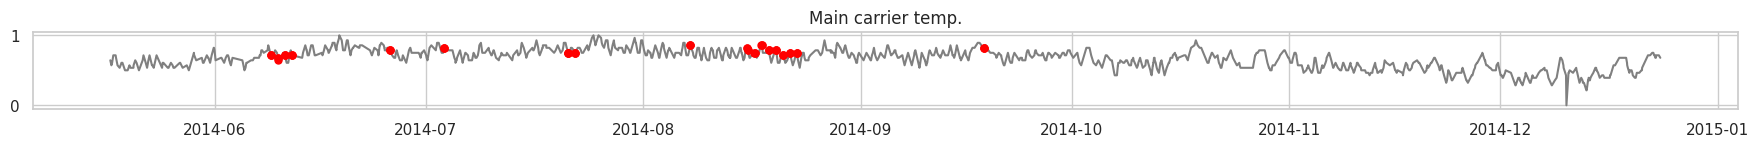

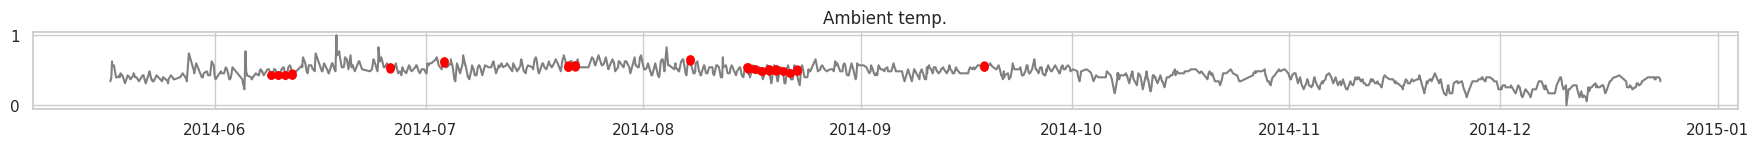

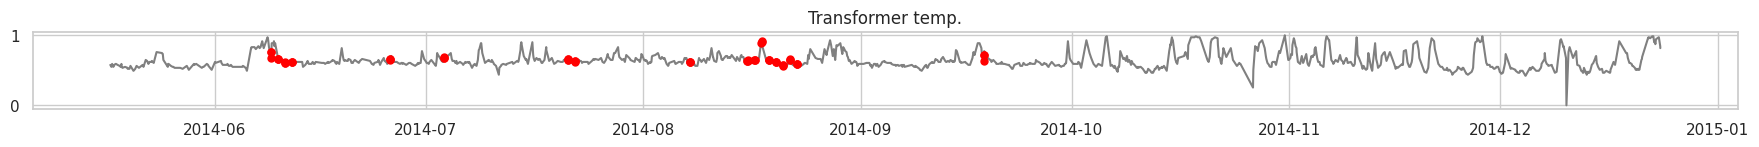

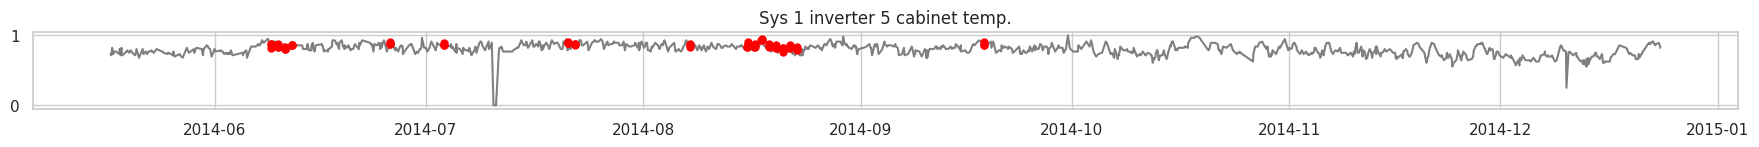

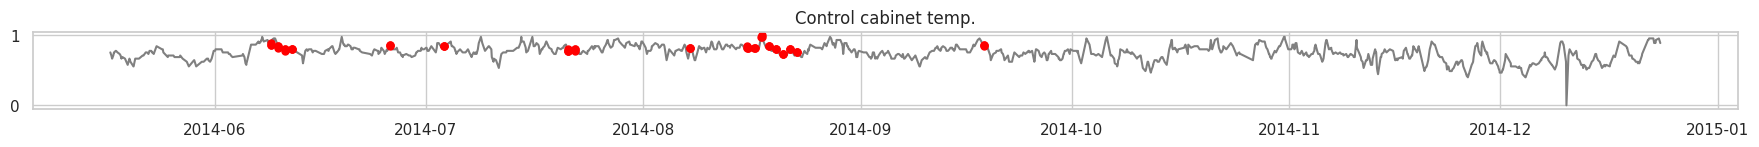

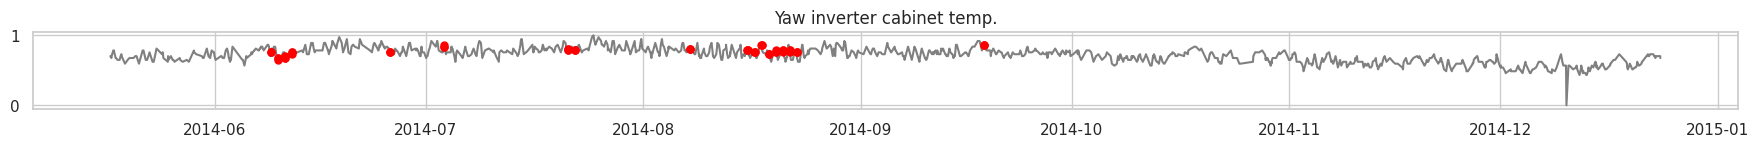

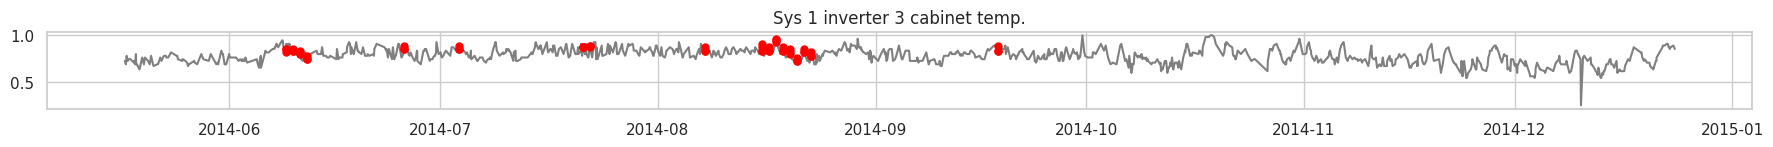

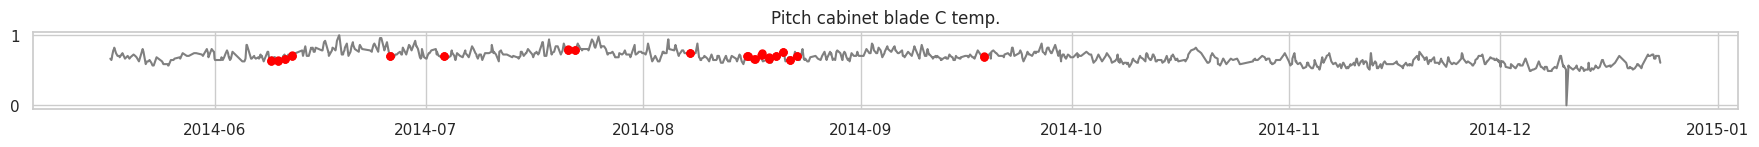

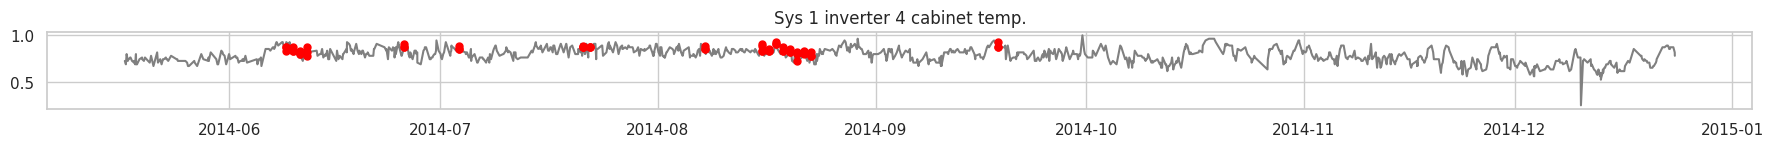

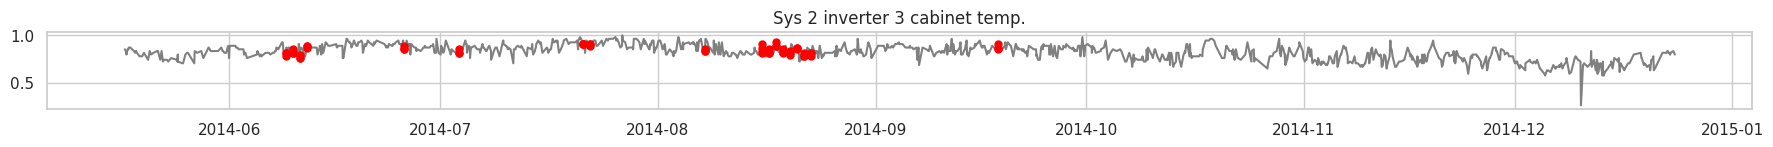

In [399]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(trainhy[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

In [400]:
train=trainhy.drop(columns=['Fault'])
test=testhy.drop(columns=['Fault'])

In [401]:
test

,Main carrier temp.,Ambient temp.,Transformer temp.,Sys 1 inverter 5 cabinet temp.,Control cabinet temp.,Yaw inverter cabinet temp.,Sys 1 inverter 3 cabinet temp.,Pitch cabinet blade C temp.,Sys 1 inverter 4 cabinet temp.,Sys 2 inverter 3 cabinet temp.
DateTime_x,,,,,,,,,,
2014-12-23 20:29:00,0.642857,0.314286,0.746479,0.803571,0.844444,0.594595,0.800000,0.588235,0.781818,0.777778
2014-12-23 21:29:00,0.607143,0.314286,0.690141,0.785714,0.800000,0.594595,0.781818,0.588235,0.763636,0.759259
2014-12-24 01:19:00,0.535714,0.228571,0.605634,0.750000,0.733333,0.567568,0.763636,0.549020,0.745455,0.722222
2014-12-24 02:40:00,0.500000,0.228571,0.605634,0.732143,0.711111,0.513514,0.745455,0.529412,0.727273,0.703704
2014-12-24 04:29:00,0.464286,0.200000,0.577465,0.732143,0.688889,0.513514,0.727273,0.529412,0.709091,0.685185
...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.500000,0.342857,0.464789,0.625000,0.577778,0.621622,0.618182,0.803922,0.618182,0.759259
2015-04-08 15:09:00,0.500000,0.342857,0.450704,0.642857,0.577778,0.621622,0.636364,0.803922,0.636364,0.759259
2015-04-08 16:30:00,0.535714,0.342857,0.464789,0.660714,0.600000,0.648649,0.654545,0.764706,0.672727,0.777778


In [402]:
# prompt: 2015 January göster

print(data_af.loc['2015-01-01':'2015-01-31'])


                     Main carrier temp.  Ambient temp.  Transformer temp.  \
DateTime_x                                                                  
2015-01-01 01:30:00            0.571429       0.371429           0.647887   
2015-01-01 01:40:00            0.571429       0.371429           0.647887   
2015-01-01 02:10:00            0.571429       0.371429           0.633803   
2015-01-01 07:39:00            0.642857       0.400000           0.929577   
2015-01-01 08:49:00            0.678571       0.400000           0.943662   
...                                 ...            ...                ...   
2015-01-31 07:49:00            0.392857       0.142857           0.887324   
2015-01-31 12:50:00            0.535714       0.200000           0.929577   
2015-01-31 15:00:00            0.535714       0.171429           0.943662   
2015-01-31 18:59:00            0.464286       0.114286           0.859155   
2015-01-31 21:29:00            0.392857       0.114286           0.718310   

In [403]:
scaler = preprocessing.MinMaxScaler()
# normalize the data

X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [404]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0],1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (1387, 1, 10)
Test data shape: (594, 1, 10)


In [405]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [406]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1, 10)]           0         
                                                                 
 lstm_28 (LSTM)              (None, 1, 16)             1728      
                                                                 
 lstm_29 (LSTM)              (None, 4)                 336       
                                                                 
 repeat_vector_7 (RepeatVec  (None, 1, 4)              0         
 tor)                                                            
                                                                 
 lstm_30 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_31 (LSTM)              (None, 1, 16)             1344      
                                                           

In [407]:
import tensorflow as tf
from tensorflow import keras

In [408]:
# fit the model to the data
nb_epochs = 60
batch_size = 5
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

Epoch 1/60
264/264 [==============================] - 8s 11ms/step - loss: 0.5634 - val_loss: 0.3355
Epoch 2/60
264/264 [==============================] - 2s 9ms/step - loss: 0.0985 - val_loss: 0.0488
Epoch 3/60
264/264 [==============================] - 2s 6ms/step - loss: 0.0490 - val_loss: 0.0486
Epoch 4/60
264/264 [==============================] - 2s 6ms/step - loss: 0.0485 - val_loss: 0.0479
Epoch 5/60
264/264 [==============================] - 2s 6ms/step - loss: 0.0481 - val_loss: 0.0472
Epoch 6/60
264/264 [==============================] - 2s 6ms/step - loss: 0.0481 - val_loss: 0.0459
Epoch 7/60
264/264 [==============================] - 1s 5ms/step - loss: 0.0477 - val_loss: 0.0450
Epoch 8/60
264/264 [==============================] - 1s 6ms/step - loss: 0.0475 - val_loss: 0.0448
Epoch 9/60
264/264 [==============================] - 2s 8ms/step - loss: 0.0472 - val_loss: 0.0444
Epoch 10/60
264/264 [==============================] - 2s 9ms/step - loss: 0.0470 - val_loss: 0.043

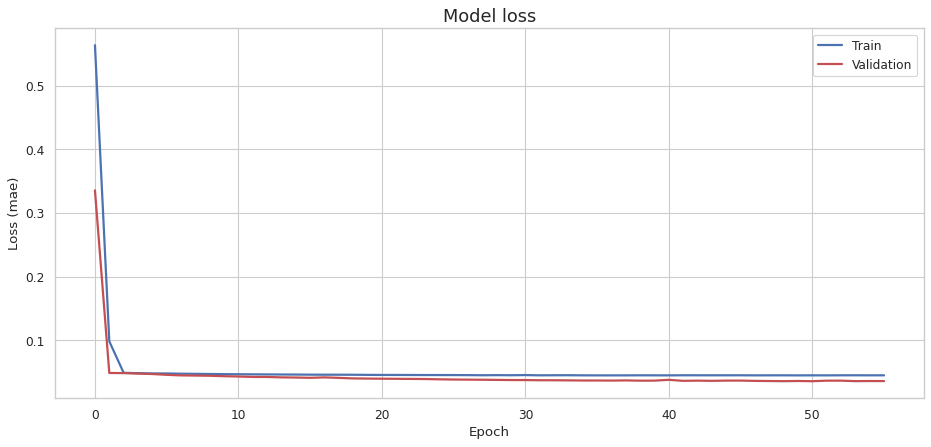

In [409]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [410]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
#plt.figure(figsize=(16,9), dpi=80)
#plt.title('Loss Distribution', fontsize=16)
#sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
#plt.xlim([0.0,.5])

44/44 [==============================] - 1s 3ms/step


Otomatik olarak belirlenen eşik değeri: 0.15308305168124148


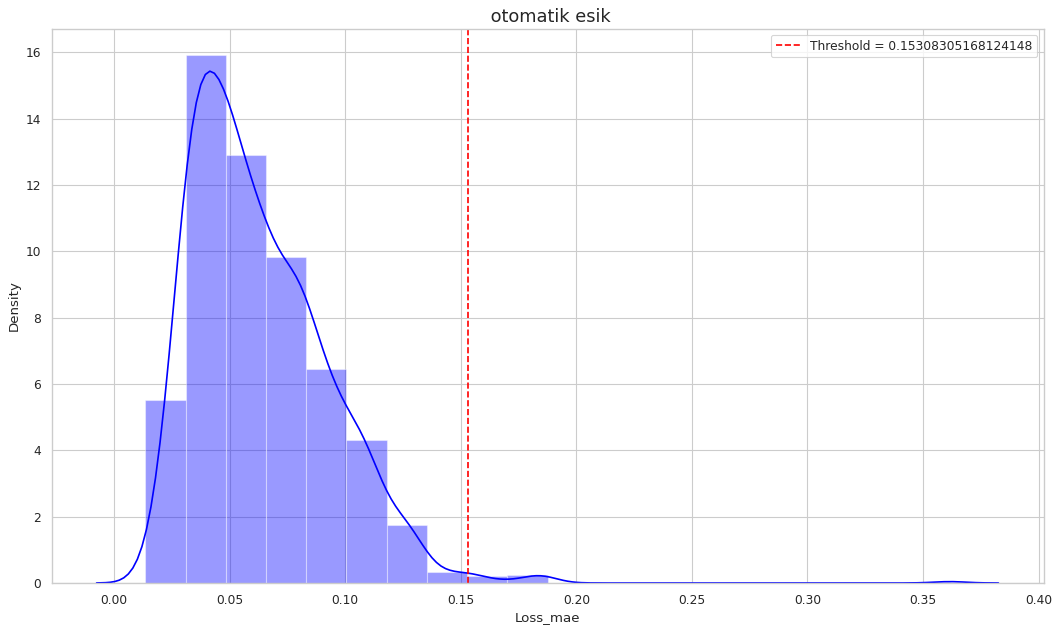

In [411]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 3 # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()



# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")



In [412]:
# calculate the loss on the test set
TRH=threshold_value
TRH2=TRH/1.5

X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = TRH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

19/19 [==============================] - 0s 2ms/step


,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.153083,False
2014-12-23 21:29:00,0.031748,0.153083,False
2014-12-24 01:19:00,0.036978,0.153083,False
2014-12-24 02:40:00,0.043645,0.153083,False
2014-12-24 04:29:00,0.044843,0.153083,False


In [413]:
lossc=np.mean(np.abs(X_pred-Xtest), axis = 1)
lossc=pd.DataFrame(lossc)

lossc['ema']= lossc.rolling(60, min_periods=1).mean()
lossc['dtres']=lossc['ema']/2+TRH2
#lossc['dtres']=lossc['ema']+TRH
lossc

,0,ema,dtres
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.039606,0.121859
2014-12-23 21:29:00,0.031748,0.035677,0.119894
2014-12-24 01:19:00,0.036978,0.036111,0.120111
2014-12-24 02:40:00,0.043645,0.037994,0.121052
2014-12-24 04:29:00,0.044843,0.039364,0.121737
...,...,...,...
2015-04-08 14:29:00,0.067530,0.053736,0.128923
2015-04-08 15:09:00,0.064453,0.053950,0.129031
2015-04-08 16:30:00,0.061892,0.054072,0.129091


In [414]:
scored0 = pd.DataFrame(index=test.index)
scored0['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored0['Threshold'] = lossc['dtres']
scored0['Anomaly'] = scored0['Loss_mae'] > scored0['Threshold']
scored0.head()

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.121859,False
2014-12-23 21:29:00,0.031748,0.119894,False
2014-12-24 01:19:00,0.036978,0.120111,False
2014-12-24 02:40:00,0.043645,0.121052,False
2014-12-24 04:29:00,0.044843,0.121737,False


In [415]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = TRH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

44/44 [==============================] - 0s 2ms/step


In [416]:
scored0_train = pd.DataFrame(index=train.index)
scored0_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)

lossc1=np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
lossc1=pd.DataFrame(lossc1)

lossc1['ema']= lossc1.rolling(60, min_periods=1).mean()
#lossc1['dtres']=(lossc1[0]-lossc1['ema'])/2+TRH
lossc1['dtres']=lossc1['ema']/2+TRH2

scored0_train['Threshold'] = lossc1['dtres']
scored0_train['Anomaly'] = scored0_train['Loss_mae'] > scored0_train['Threshold']
scored0 = pd.concat([scored0_train, scored0])

In [417]:
#broken_rows2=data_af['Fault']
broken_rows2 = trainhy['Fault']
broken_rows2=pd.DataFrame(broken_rows2)
broken_rows2 = broken_rows2[broken_rows2['Fault']==1]

broken_rows2

,Fault
DateTime_x,
2014-06-08 23:50:00,1
2014-06-09 00:00:00,1
2014-06-09 00:09:00,1
2014-06-09 23:50:00,1
2014-06-10 00:00:00,1
2014-06-10 00:09:00,1
2014-06-10 23:50:00,1
2014-06-11 00:00:00,1
2014-06-11 00:09:00,1


In [418]:
broken_rows2['Loss_mae']=scored['Loss_mae']
broken_rows2['Threshold']=scored['Threshold']

In [419]:
broken_rows20 = trainhy['Fault']
broken_rows20=pd.DataFrame(broken_rows20)
broken_rows20 = broken_rows20[broken_rows20['Fault']==1]
broken_rows20['Loss_mae']=scored0['Loss_mae']
broken_rows20['Threshold']=scored0['Threshold']

In [420]:
broken_rows2=pd.DataFrame(broken_rows2)

broken_rows20=pd.DataFrame(broken_rows20)

In [421]:
scored1=scored
scored10=scored0
broken_rows2=broken_rows2.sort_index()
broken_rows20=broken_rows20.sort_index()

In [422]:
broken_rows2=broken_rows2[['Loss_mae','Fault']]
broken_rows20=broken_rows20[['Loss_mae','Fault']]

In [423]:
scored1=pd.DataFrame(scored1)
scored10=pd.DataFrame(scored10)

scored11=scored1
scored110=scored10

In [424]:
scored11['Anomaly'].replace(False,0, inplace=True)
scored11['Anomaly'].replace(True,1, inplace=True)

scored110['Anomaly'].replace(False,0, inplace=True)
scored110['Anomaly'].replace(True,1, inplace=True)

scored11

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-05-17 02:30:00,0.056389,0.153083,0
2014-05-17 06:09:00,0.056882,0.153083,0
2014-05-17 08:20:00,0.067944,0.153083,0
2014-05-17 08:39:00,0.066853,0.153083,0
2014-05-17 12:40:00,0.107001,0.153083,0
...,...,...,...
2015-04-08 14:29:00,0.067530,0.153083,0
2015-04-08 15:09:00,0.064453,0.153083,0
2015-04-08 16:30:00,0.061892,0.153083,0


In [425]:
scored1 = scored1.iloc[ :last_40percent, :]
scored10 =scored10.iloc[ :last_40percent, :]
scored10

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-05-17 02:30:00,0.056389,0.130250,0
2014-05-17 06:09:00,0.056882,0.130373,0
2014-05-17 08:20:00,0.067944,0.132258,0
2014-05-17 08:39:00,0.066853,0.133064,0
2014-05-17 12:40:00,0.107001,0.137562,0
...,...,...,...
2014-12-23 04:40:00,0.040972,0.119846,0
2014-12-23 13:50:00,0.041447,0.120011,0
2014-12-23 14:30:00,0.041447,0.120079,0


In [426]:
last_percent = round(len(scored) - len(scored)*perc)
sc_train = scored.iloc[ :last_percent, :]
sc_test= scored.iloc[last_percent: ,:]

sc_test

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.153083,False
2014-12-23 21:29:00,0.031748,0.153083,False
2014-12-24 01:19:00,0.036978,0.153083,False
2014-12-24 02:40:00,0.043645,0.153083,False
2014-12-24 04:29:00,0.044843,0.153083,False
...,...,...,...
2015-04-08 14:29:00,0.067530,0.153083,False
2015-04-08 15:09:00,0.064453,0.153083,False
2015-04-08 16:30:00,0.061892,0.153083,False


In [427]:
last_percent = round(len(scored0) - len(scored0)*perc)
sc_train0 = scored0.iloc[ :last_percent, :]
sc_test0= scored0.iloc[last_percent: ,:]

sc_test0

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.121859,False
2014-12-23 21:29:00,0.031748,0.119894,False
2014-12-24 01:19:00,0.036978,0.120111,False
2014-12-24 02:40:00,0.043645,0.121052,False
2014-12-24 04:29:00,0.044843,0.121737,False
...,...,...,...
2015-04-08 14:29:00,0.067530,0.128923,False
2015-04-08 15:09:00,0.064453,0.129031,False
2015-04-08 16:30:00,0.061892,0.129091,False


In [428]:
y_pred=sc_test['Anomaly']

tres=sc_test['Threshold']

y_true=testhy['Fault']

lossm=sc_test['Loss_mae']

y_pred

DateTime_x
2014-12-23 20:29:00    False
2014-12-23 21:29:00    False
2014-12-24 01:19:00    False
2014-12-24 02:40:00    False
2014-12-24 04:29:00    False
                       ...  
2015-04-08 14:29:00    False
2015-04-08 15:09:00    False
2015-04-08 16:30:00    False
2015-04-08 17:09:00    False
2015-04-08 18:00:00    False
Name: Anomaly, Length: 594, dtype: bool

In [429]:
y_pred0=sc_test0['Anomaly']

tres0=sc_test0['Threshold']

y_true0=testhy['Fault']

lossm0=sc_test0['Loss_mae']

In [430]:
y_pred=pd.DataFrame(y_pred)
y_pred1=y_pred['Anomaly'].replace(False, 0, inplace=True)
y_pred1=y_pred['Anomaly'].replace(True, 1, inplace=True)
y_pred0=pd.DataFrame(y_pred0)
y_pred10=y_pred0['Anomaly'].replace(False, 0, inplace=True)
y_pred10=y_pred0['Anomaly'].replace(True, 1, inplace=True)

y_true1=pd.DataFrame(y_true)
y_true2=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true1['loss']=lossm
y_true1= y_true1.reindex(columns=['loss', 'Fault'])

broken_rows1 = y_true1[y_true1['Fault']==1]
broken_rows1=broken_rows1.sort_index()

sc_test1=sc_test
sc_test1['Anomaly'].replace(False, 0, inplace=True)
sc_test1['Anomaly'].replace(True, 1, inplace=True)

In [431]:
y_true10=pd.DataFrame(y_true)
y_true20=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true10['loss']=lossm
y_true10= y_true10.reindex(columns=['loss', 'Fault'])

broken_rows10 = y_true10[y_true10['Fault']==1]
broken_rows10=broken_rows10.sort_index()

sc_test10=sc_test0
sc_test10['Anomaly'].replace(False, 0, inplace=True)
sc_test10['Anomaly'].replace(True, 1, inplace=True)

In [432]:
broken_rows1=pd.DataFrame(broken_rows1)
broken_rows10=pd.DataFrame(broken_rows10)


In [433]:
sc_test10=pd.DataFrame(sc_test10)
sc_test10

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.121859,0
2014-12-23 21:29:00,0.031748,0.119894,0
2014-12-24 01:19:00,0.036978,0.120111,0
2014-12-24 02:40:00,0.043645,0.121052,0
2014-12-24 04:29:00,0.044843,0.121737,0
...,...,...,...
2015-04-08 14:29:00,0.067530,0.128923,0
2015-04-08 15:09:00,0.064453,0.129031,0
2015-04-08 16:30:00,0.061892,0.129091,0


In [434]:
sc_test1=pd.DataFrame(sc_test1)
sc_test1

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-12-23 20:29:00,0.039606,0.153083,0
2014-12-23 21:29:00,0.031748,0.153083,0
2014-12-24 01:19:00,0.036978,0.153083,0
2014-12-24 02:40:00,0.043645,0.153083,0
2014-12-24 04:29:00,0.044843,0.153083,0
...,...,...,...
2015-04-08 14:29:00,0.067530,0.153083,0
2015-04-08 15:09:00,0.064453,0.153083,0
2015-04-08 16:30:00,0.061892,0.153083,0


In [435]:
import plotly.express as px


fig2 = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['red'])

fig2.add_trace(px.line(sc_test1).data[0])
fig2.add_trace(px.line(sc_test1).data[1])
fig2.add_trace(px.line(sc_test10).data[1])

fig2.data[-2].line.color = 'orange'
fig2.data[-1].line.color = 'green'
fig2.show()

In [436]:
# prompt: yukarıdaki grafikte Loss_mae değeri Threshold'u yukarı kestiği noktada "ALARM" sinyali ve zamanı çıksın ve grafikte göster

import plotly.graph_objects as go

fig = go.Figure()
fig = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['black'])

# Add traces for the loss_mae, threshold, and anomaly lines
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Loss_mae'], name='Loss_mae'))
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Threshold'], name='Threshold'))
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Anomaly'], name='Anomaly'))

# Find the index where the loss_mae line crosses the threshold
threshold_crossing_index = np.where(np.diff(np.sign(sc_test['Loss_mae'] - sc_test['Threshold'])) != 0)[0][0]

# Add a vertical line at the threshold crossing point
fig.add_vline(x=sc_test.index[threshold_crossing_index], line_color='red', line_dash='dash')

# Add a text annotation at the threshold crossing point
fig.add_annotation(x=sc_test.index[threshold_crossing_index], y=sc_test['Threshold'][threshold_crossing_index], text='ALARM', showarrow=False)

# Update the figure layout
fig.update_layout(title='Anomaly Detection with Threshold', xaxis_title='Time', yaxis_title='Loss_mae')

# Show the figure
fig.show()


In [437]:
# prompt: yukarıdaki grafik için ilk alarm zamanı

threshold_crossing_index = np.where(np.diff(np.sign(sc_test['Loss_mae'] - sc_test['Threshold'])) != 0)[0][0]
print("First alarm time:", sc_test.index[threshold_crossing_index])


First alarm time: 2015-01-04 01:30:00


In [438]:
# prompt: yukarıdaki grafik için ilk arıza zamanı broken rows

print("First failure time:", broken_rows1.index[0])


First failure time: 2015-01-14 22:50:00


In [439]:
y_true2=pd.DataFrame(y_true2)


In [440]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred['Fault'].replace(False,0, inplace=True)
y_pred['Fault'].replace(True,1, inplace=True)

In [441]:
y_pred0=pd.DataFrame(y_pred0)
y_pred0.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred0['Fault'].replace(False,0, inplace=True)
y_pred0['Fault'].replace(True,1, inplace=True)

In [442]:
y_true2 = y_true2.to_numpy()
y_pred = y_pred.to_numpy()
y_pred0 = y_pred0.to_numpy()

In [443]:
# Confusion matrix hesapla
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp, = confusion_matrix(y_true2, y_pred).ravel()
tn0, fp0, fn0, tp0 =confusion_matrix(y_true20, y_pred0).ravel()
# PR ve FPR hesapla

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr0 = tp0 / (tp0 + fn0)
fpr0 = fp0 / (fp0 + tn0)

accuracy = np.mean(y_true2 == y_pred)
accuracy0 = np.mean(y_true20 == y_pred0)
# Sonuçları yazdır
print("Fix TPR (Sensitivity):", tpr)
print("Fix FPR (1-Specificity):", fpr)
print("Fix Accuracy:", accuracy)

Fix TPR (Sensitivity): 0.0
Fix FPR (1-Specificity): 0.015306122448979591
Fix Accuracy: 0.9747474747474747


In [444]:
print("EMA TPR (Sensitivity):", tpr0)
print("EMA FPR (1-Specificity):", fpr0)
print("EMA Accuracy:", accuracy0)

EMA TPR (Sensitivity): 0.0
EMA FPR (1-Specificity): 0.015306122448979591
EMA Accuracy: 0.9747474747474747


In [445]:
print(classification_report(y_true2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       588
           1       0.00      0.00      0.00         6

    accuracy                           0.97       594
   macro avg       0.49      0.49      0.49       594
weighted avg       0.98      0.97      0.98       594



In [446]:
print(classification_report(y_true20, y_pred0))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       588
           1       0.00      0.00      0.00         6

    accuracy                           0.97       594
   macro avg       0.49      0.49      0.49       594
weighted avg       0.98      0.97      0.98       594



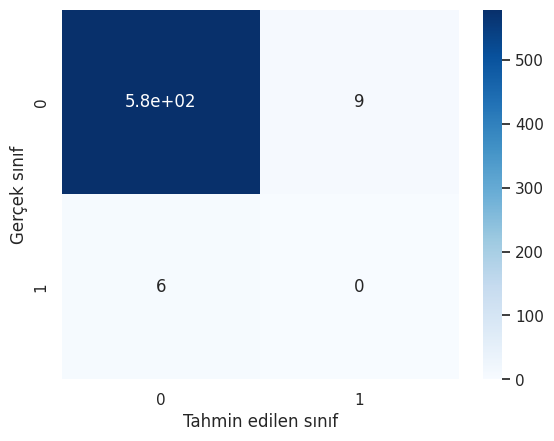

In [447]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm = confusion_matrix(y_true2, y_pred)

# Görselleştir
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()

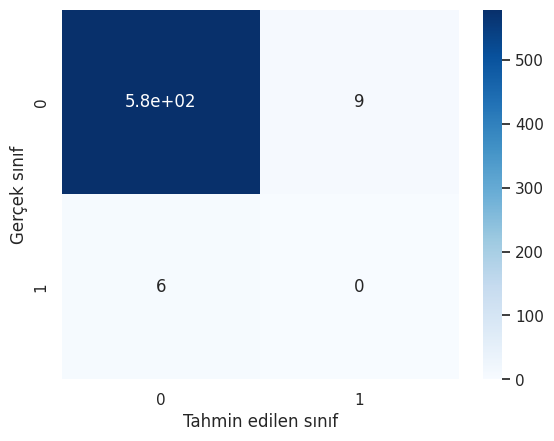

In [448]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm0 = confusion_matrix(y_true20, y_pred0)

# Görselleştir
sns.heatmap(cm0, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()